In [ ]:
#CLASSIFICADORES
#Pipeline (sequencia de procedimentos)
#1. Normalizar
#2. Balancear
#3. Determinar os hiperparâmetros (para 28/11)
#4. Treinar o modelo
#5. Avaliar a acurácia do modelo


In [7]:
#0 Abrir os dados
import pandas as pd
#Segmentar em atributos e classes
dados = pd.read_csv('./diabetes.csv') 
dados_atributos = dados.drop(columns=['class'])
dados_classes = dados['class']
print(dados.columns)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'], dtype='object')


In [3]:
#1.Normalizar
from sklearn.preprocessing import MinMaxScaler
normalizador= MinMaxScaler()
#1.1 Obter o modelo de normalização - métod fit()
modelo_normalizador_diabetes = normalizador.fit(dados_atributos)
#1.2 Salvar o modelo normalizador para uso posterior
from pickle import dump
dump(modelo_normalizador_diabetes, open('modelo_normalizador_diabetes.pkl', 'wb'))


In [ ]:

#1.3 Normalizar os dados originais - método fit_transform()
dados_atributos_normalizados = normalizador.fit_transform(dados_atributos)

dados_atributos_normalizados

In [ ]:
#1.4 Reconstituir os dados para o formato Data Frame
dados_atributos_normalizados = pd.DataFrame(dados_atributos_normalizados, columns=dados_atributos.columns)
dados_atributos_normalizados

In [ ]:
#2 Balancear os dados
#Frequencia original das classes
print('Frequencia original das classes:\n', dados_classes.value_counts())
from imblearn.over_sampling import  SMOTE
#Construir o balanceador
resampler = SMOTE()
dados_atributos_b, dados_classes_b = resampler.fit_resample(dados_atributos_normalizados, dados_classes)
print('Frequencia balanceada das classes:\n', dados_classes_b.value_counts())

Frequencia original das classes:
 tested_negative    500
tested_positive    268
Name: class, dtype: int64
Frequencia balanceada das classes:
 tested_negative    500
tested_positive    500
Name: class, dtype: int64


In [ ]:


#
#4. Treinar o modelo
#Os testes do modelo serão aplicados com Hold Out: Técnica em que os dados são divididos em segmento para treinamento e segmento para testes (70% para treinamento / 30% para testes)
#Segmentar a base em dados para treinamento e dados para testes
from sklearn.model_selection import train_test_split
atributos_train, atributos_test, classes_train, classes_test = train_test_split(dados_atributos_b,dados_classes_b, test_size = 0.3)

#Importar o indutor
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier() #Intanciar um objeto a partir do indutor selecionado
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


#Treinar o modelo
diabetes_tree = tree.fit(atributos_train, classes_train)
diabetes_rf = rf.fit(atributos_train, classes_train)

#Vizializar as classes dentro do modelo obtido
print('Clasess Tree:', diabetes_tree.classes_)
print('Clasess RD:', diabetes_tree.classes_)

#Pretestar o modelo
#Inferir as classes para os atributos reservados para teste
diabetes_test_tree = diabetes_tree.predict(atributos_test)
diabetes_test_rf = diabetes_rf.predict(atributos_test)

#O objeto diabetes_test contem os resultados das classes inferidas pelo modelo levando em consideração os atributos separas para testes


Clasess Tree: ['tested_negative' 'tested_positive']
Clasess RD: ['tested_negative' 'tested_positive']


In [ ]:
#5. AVALIAR A ACURÁCIA DO MODELO
from sklearn import metrics
print('Acurácia global (tree):', metrics.accuracy_score(classes_test,diabetes_test_tree))
print('Acurácia global (rf):', metrics.accuracy_score(classes_test,diabetes_test_rf))

Acurácia global (tree): 0.7266666666666667
Acurácia global (rf): 0.8333333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[76 73]
 [77 74]]


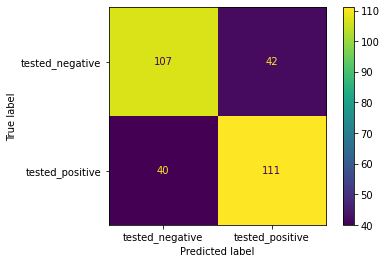

In [ ]:
#MATRIZ DE CONTINGÊNCIA TREE
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix #para o gráfico
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(diabetes_tree, atributos_test, classes_test)
plt.show
#Imprimir a matriz de contingência
print(confusion_matrix(classes_test, specie_test,labels = iris_tree.classes_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[76 73]
 [77 74]]


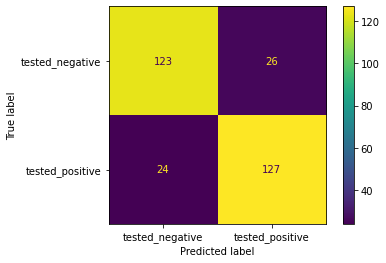

In [ ]:
#MATRIZ DE CONTINGÊNCIA RANDOM FOREST
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix #para o gráfico
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(diabetes_rf, atributos_test, classes_test)
plt.show
#Imprimir a matriz de contingência
print(confusion_matrix(classes_test, specie_test,labels = iris_tree.classes_))

In [ ]:
#SALVAR O melhor MODELO PARA USO POSTERIOR
from pickle import dump
dump(diabetes_rf,open('diabetes_rf_model_1.pkl','wb'))

['Iris-virginica']
Distribuição probabilística
[[0. 0. 1.]]
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
